In [114]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [115]:
data=pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [116]:
df=pd.DataFrame(data=data)

In [117]:
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [118]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int32
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


In [120]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

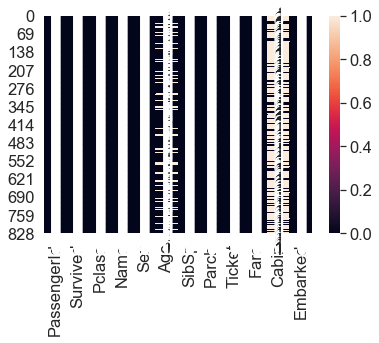

In [121]:
sns.heatmap(df.isnull(),annot=True)

In [122]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000


In [123]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [124]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,NaN,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [125]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp=imputer.fit(df)
df_titanic=imp.fit_transform(df.values)
print(df_titanic)
df_new=pd.DataFrame(data=df_titanic,columns=df.columns)
df_new

[[  1.       0.       3.     ...   0.       7.25     2.    ]
 [  2.       1.       1.     ...   0.      71.2833   0.    ]
 [  3.       1.       3.     ...   0.       7.925    2.    ]
 ...
 [889.       0.       3.     ...   2.      23.45     2.    ]
 [890.       1.       1.     ...   0.      30.       0.    ]
 [891.       0.       3.     ...   0.       7.75     1.    ]]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500,2.0
1,2.0,1.0,1.0,0.0,38.000000,1.0,0.0,71.2833,0.0
2,3.0,1.0,3.0,0.0,26.000000,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,0.0,35.000000,1.0,0.0,53.1000,2.0
4,5.0,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.000000,0.0,0.0,13.0000,2.0
887,888.0,1.0,1.0,0.0,19.000000,0.0,0.0,30.0000,2.0
888,889.0,0.0,3.0,0.0,29.699118,1.0,2.0,23.4500,2.0
889,890.0,1.0,1.0,1.0,26.000000,0.0,0.0,30.0000,0.0


In [126]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null float64
Survived       891 non-null float64
Pclass         891 non-null float64
Sex            891 non-null float64
Age            891 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(9)
memory usage: 62.8 KB


In [127]:
df_new.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [128]:
for col in data.columns.values:
    print("Number of unique values of{} :{} ".format(col,data[col].nunique()))

Number of unique values ofPassengerId :891 
Number of unique values ofSurvived :2 
Number of unique values ofPclass :3 
Number of unique values ofName :891 
Number of unique values ofSex :2 
Number of unique values ofAge :88 
Number of unique values ofSibSp :7 
Number of unique values ofParch :7 
Number of unique values ofTicket :681 
Number of unique values ofFare :248 
Number of unique values ofCabin :147 
Number of unique values ofEmbarked :4 


In [129]:
df_new.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.246689
dtype: float64

In [130]:
for i in df_new.columns:
    if df_new.skew().loc[i]>0.55:
        df_new[i]=np.log1p(df_new[i])

In [131]:
df_new.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          1.661245
Parch          1.675439
Fare           0.394928
Embarked      -1.246689
dtype: float64

In [132]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
print(df_new.shape)
df_titanic=df_new.loc[(z<3).all(axis=1)]
print(df_titanic.shape)

(891, 9)
(844, 9)


In [133]:
for i in df_titanic.columns:
    if df_titanic.skew().loc[i]>0.55:
        df_titanic[i]=np.log1p(df_titanic[i])

In [134]:
df_titanic.skew()

PassengerId    0.008182
Survived       0.417061
Pclass        -0.631176
Sex           -0.594266
Age            0.275362
SibSp          1.097903
Parch          1.478642
Fare           0.642638
Embarked      -1.208124
dtype: float64

PassengerId       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Survived       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Pclass         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Sex            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Age            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
SibSp          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Parch                AxesSubplot(0.125,0.125;0.110714x0.343182)
Fare              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Embarked          AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

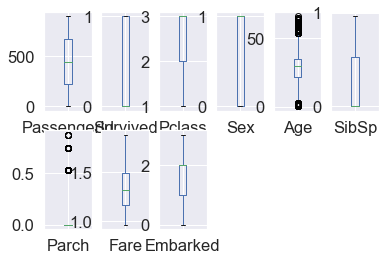

In [135]:
df_titanic.plot(kind='box',subplots=True,layout=(2,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBF1737548>,
      dtype=object)

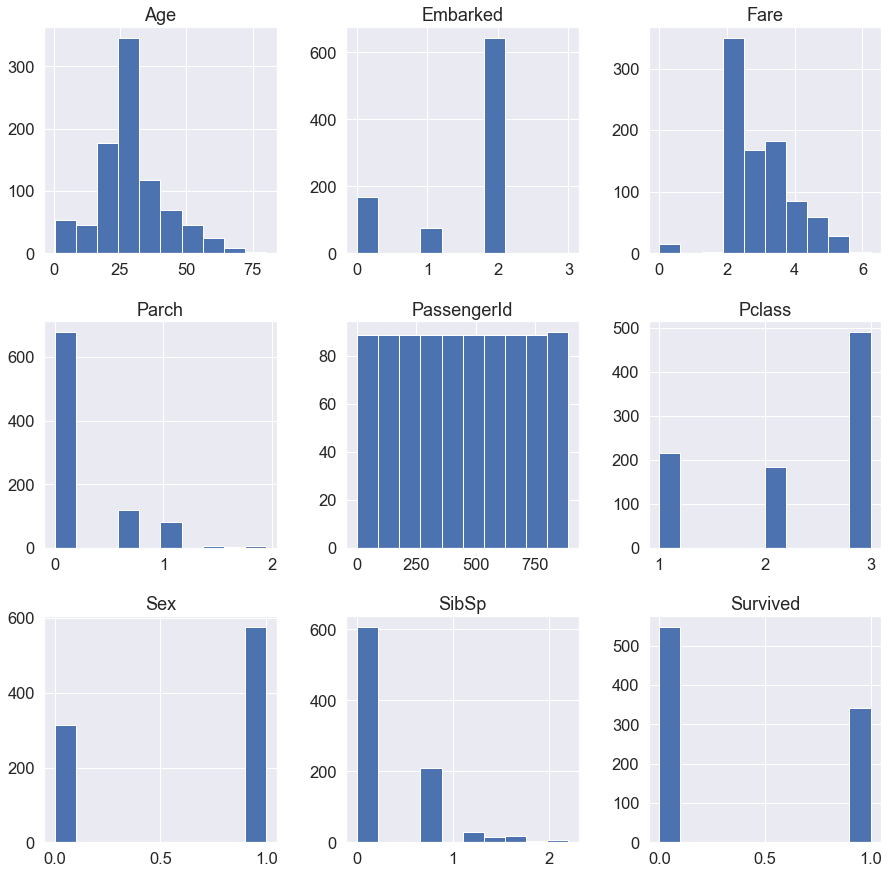

In [136]:
df_new.hist(figsize=(15,15))

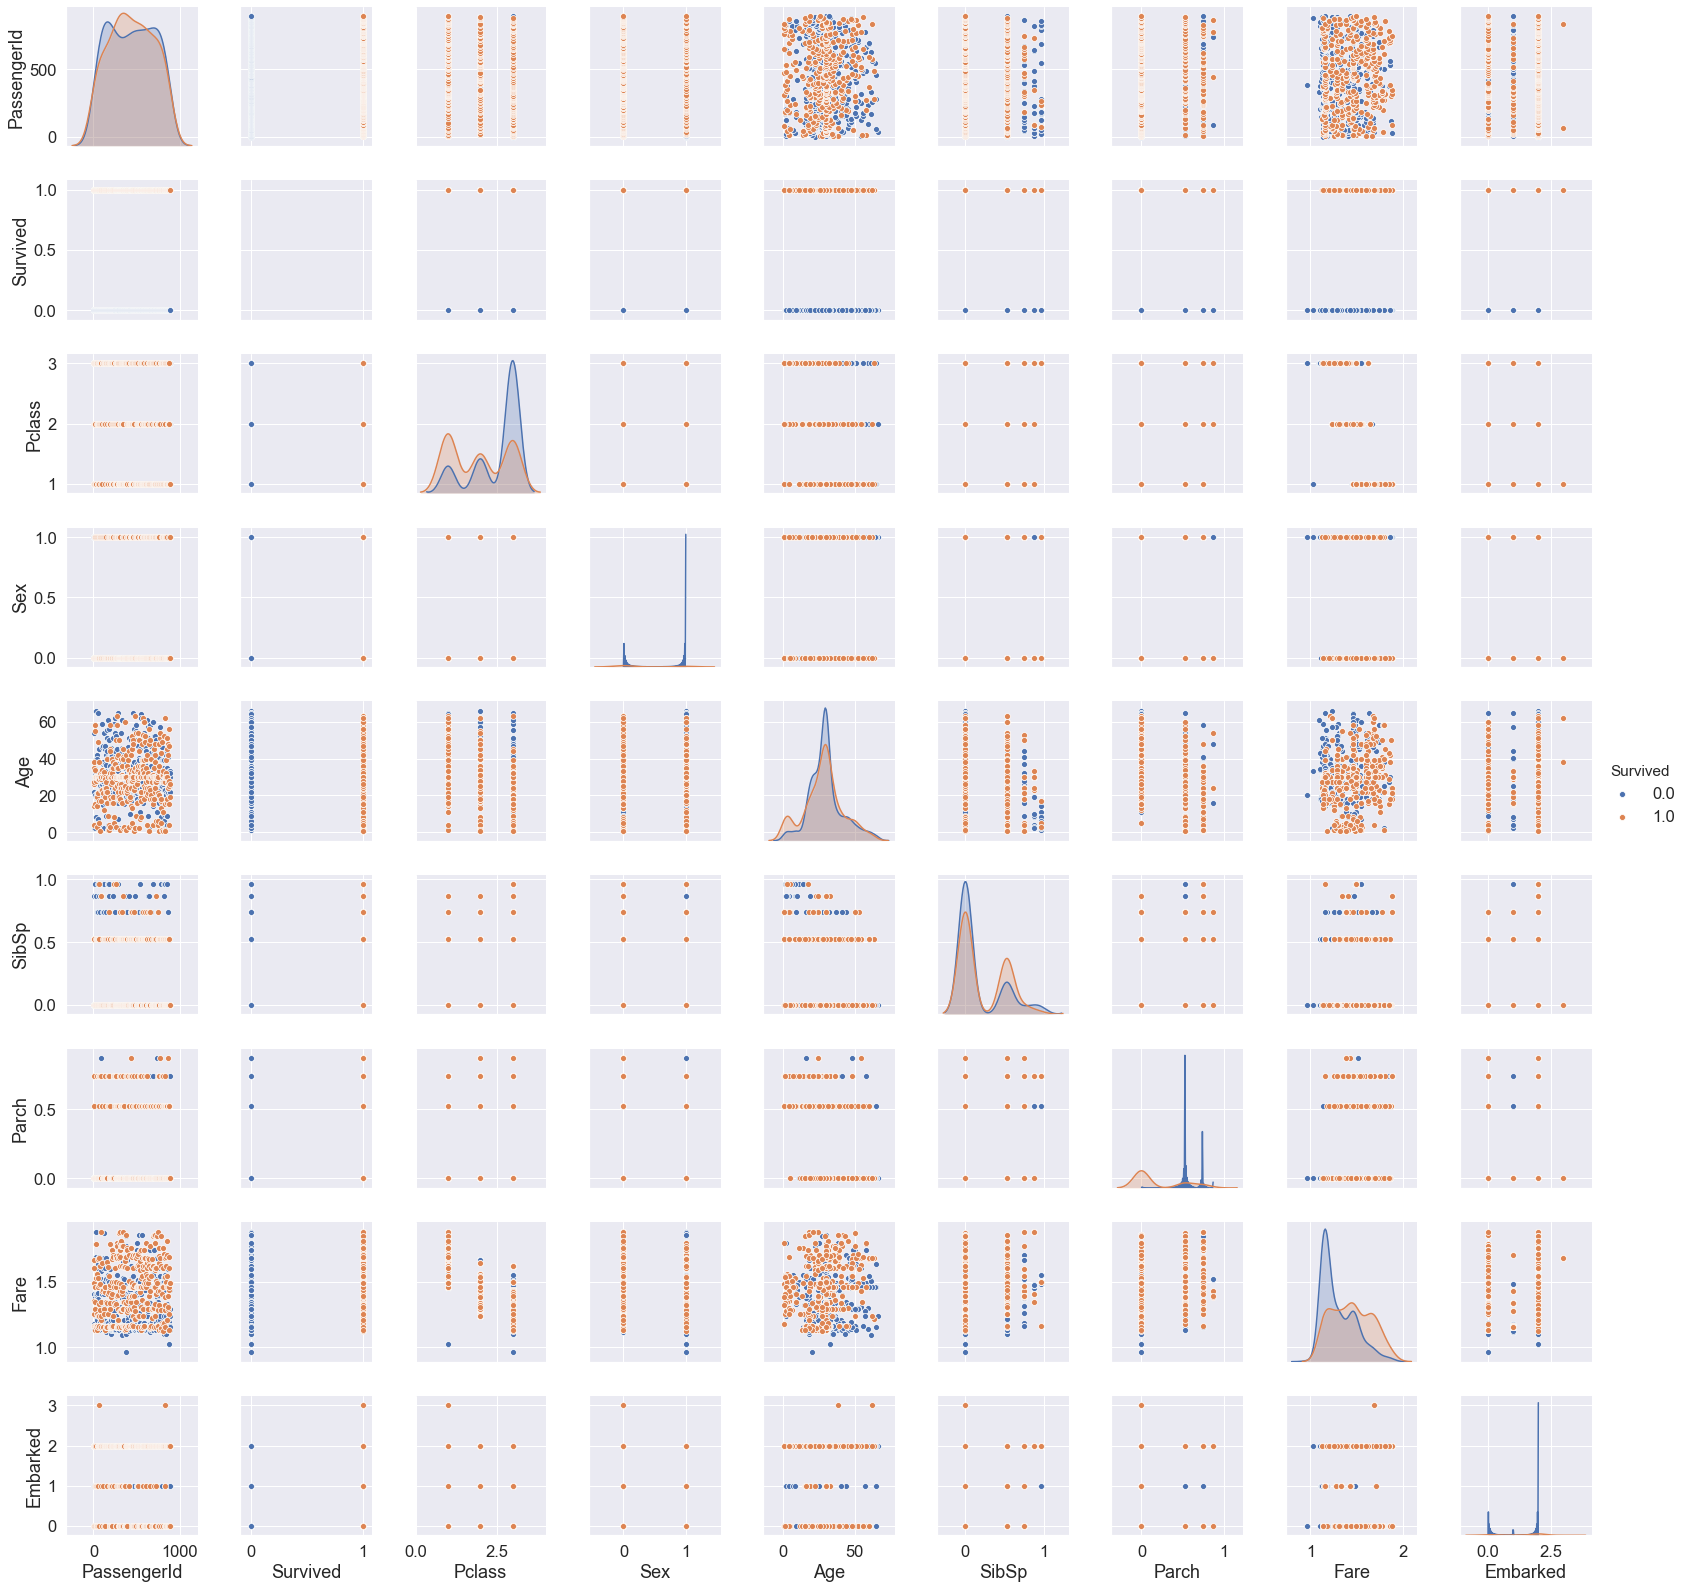

In [137]:
sns.pairplot(df_titanic,hue='Survived')

(9.0, 0.0)

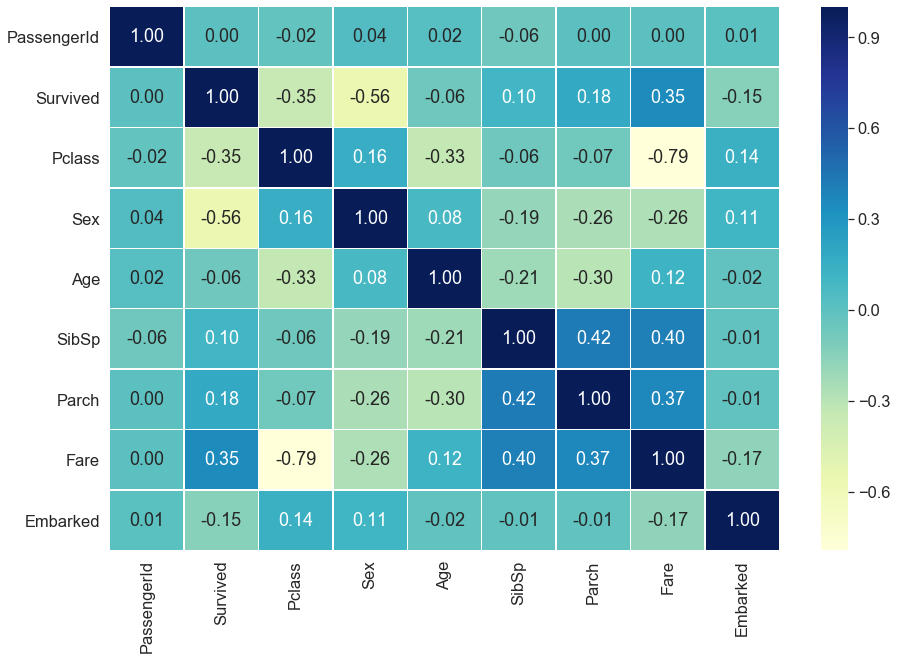

In [138]:
corr_matrix = df_titanic.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [139]:
y=df_titanic['Survived']

In [140]:
x=df_titanic.drop('Survived',axis=1)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,3.0,1.0,22.000000,0.526589,0.000000,1.134691,2.0
1,2.0,1.0,0.0,38.000000,0.526589,0.000000,1.664038,0.0
2,3.0,3.0,0.0,26.000000,0.000000,0.000000,1.159662,2.0
3,4.0,1.0,0.0,35.000000,0.526589,0.000000,1.607603,2.0
4,5.0,3.0,1.0,35.000000,0.000000,0.000000,1.164014,2.0
...,...,...,...,...,...,...,...,...
886,887.0,2.0,1.0,27.000000,0.000000,0.000000,1.291725,2.0
887,888.0,1.0,0.0,19.000000,0.000000,0.000000,1.489299,2.0
888,889.0,3.0,0.0,29.699118,0.526589,0.741276,1.434282,2.0
889,890.0,1.0,1.0,26.000000,0.000000,0.000000,1.489299,0.0


In [141]:
x.shape

(844, 8)

In [142]:
y.shape

(844,)

In [143]:
df_titanic["Survived"].value_counts()

0.0    508
1.0    336
Name: Survived, dtype: int64

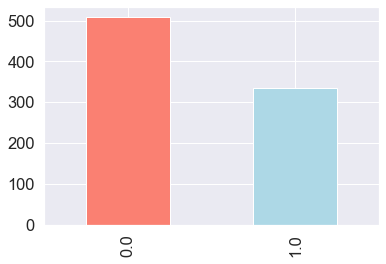

In [144]:
df_titanic["Survived"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [145]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.22,stratify=y)

In [147]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [148]:

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores


{'Logistic Regression': 0.7849462365591398,
 'KNN': 0.8064516129032258,
 'Random Forest': 0.8064516129032258,
 'GaussianNB': 0.7580645161290323,
 'SVC': 0.8010752688172043,
 'DecisionTreeClassifier': 0.7258064516129032,
 'GradientBoostingClassifier': 0.8010752688172043}

In [149]:
models = {"Random Forest": RandomForestClassifier(n_estimators=100),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier()
         # "MultinomialNB":MultinomialNB()
         }
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_acc_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(x_train,y_train)
        pre=model.predict(x_test)
        model_acc_scores[name]=accuracy_score(y_test,pre)
    return model_acc_scores

In [150]:
model_acc_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test,
                             )

model_acc_scores

{'Random Forest': 0.8225806451612904,
 'Logistic Regression': 0.7849462365591398,
 'KNN': 0.8064516129032258,
 'GaussianNB': 0.7580645161290323,
 'SVC': 0.8010752688172043,
 'DecisionTreeClassifier': 0.7204301075268817,
 'GradientBoostingClassifier': 0.8010752688172043}

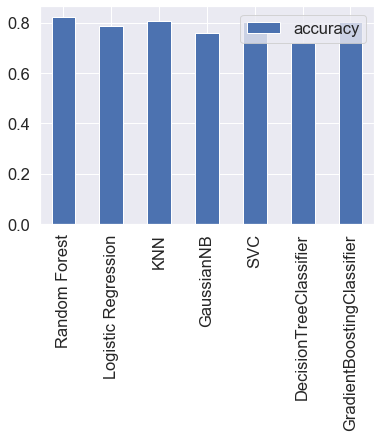

In [151]:
model_compare = pd.DataFrame(model_acc_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [152]:
def maxaccscore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [153]:
rm=RandomForestClassifier(n_estimators=100)
acc_score=maxaccscore(rm,x,y)

max acc score corresponding to 85 is: 0.8978494623655914


In [154]:
svc=SVC()
acc_score=maxaccscore(svc,x,y)

max acc score corresponding to 56 is: 0.8709677419354839


In [155]:
knn=KNeighborsClassifier(n_neighbors=6)
acc_score=maxaccscore(knn,x,y)

max acc score corresponding to 85 is: 0.8709677419354839


In [156]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    svc=SVC(kernel=i)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

0.7688172043010753
[[93 19]
 [24 50]]
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       112
         1.0       0.72      0.68      0.70        74

    accuracy                           0.77       186
   macro avg       0.76      0.75      0.76       186
weighted avg       0.77      0.77      0.77       186

0.8225806451612904
[[100  12]
 [ 21  53]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       112
         1.0       0.82      0.72      0.76        74

    accuracy                           0.82       186
   macro avg       0.82      0.80      0.81       186
weighted avg       0.82      0.82      0.82       186

0.8010752688172043
[[99 13]
 [24 50]]
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       112
         1.0       0.79      0.68      0.73        74

    accuracy                           0.80       186
   macro a

In [157]:
def dectree(cr,rs):
    dt_gini=DecisionTreeClassifier(criterion=cr,random_state=rs)
    dt_gini.fit(x_train,y_train)
    dt_gini.score(x_train,y_train)
    preddt=dt_gini.predict(x_test)
    print(accuracy_score(y_test,preddt))


In [158]:
dectree('gini',85)

0.7204301075268817


In [159]:
dectree('entropy',85)

0.7526881720430108


******************** SVC *********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy Score= 0.8010752688172043


Cross_val_score= 0.8140388444534441


roc_auc_score =  0.7798021235521235


Classification report
               precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       112
         1.0       0.79      0.68      0.73        74

    accuracy                           0.80       186
   macro avg       0.80      0.78      0.79       186
weighted avg       0.80      0.80      0.80       186



[[99 13]
 [24 50]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



******************** Random Forest *********************


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, m

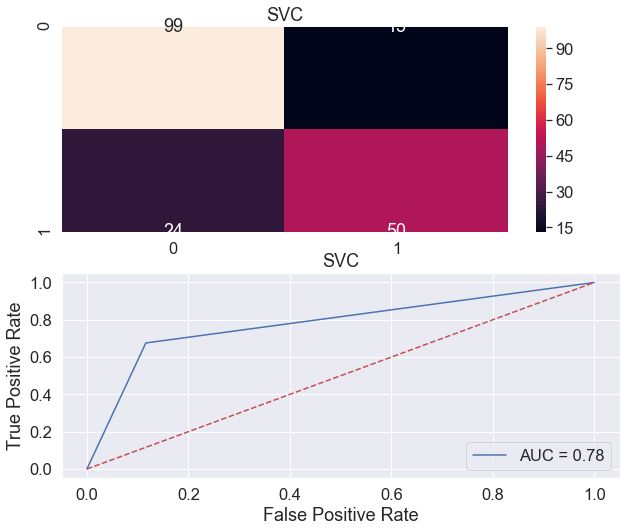

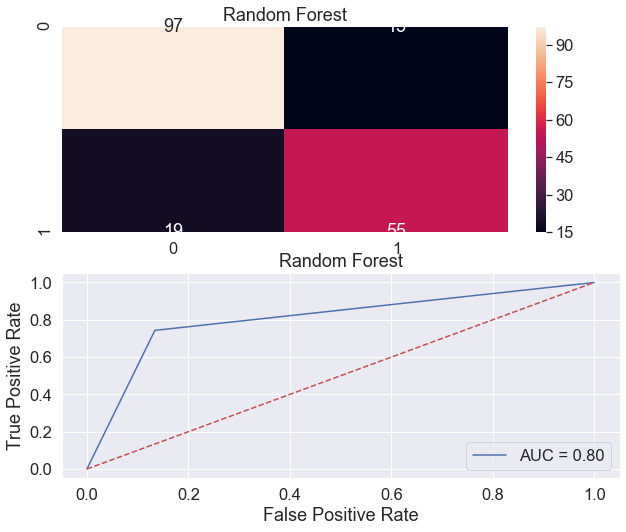

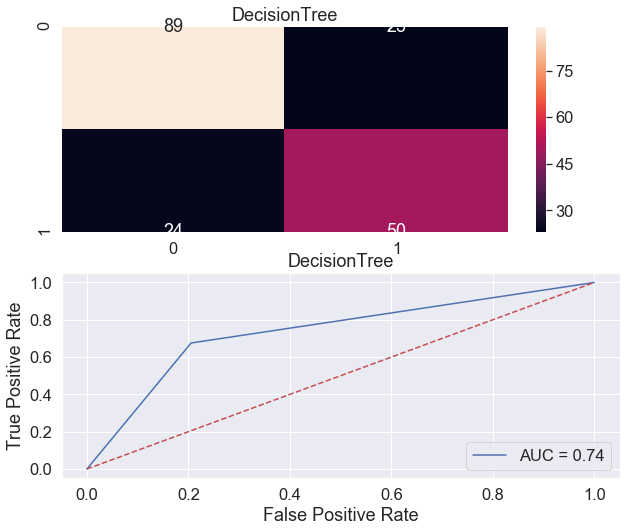

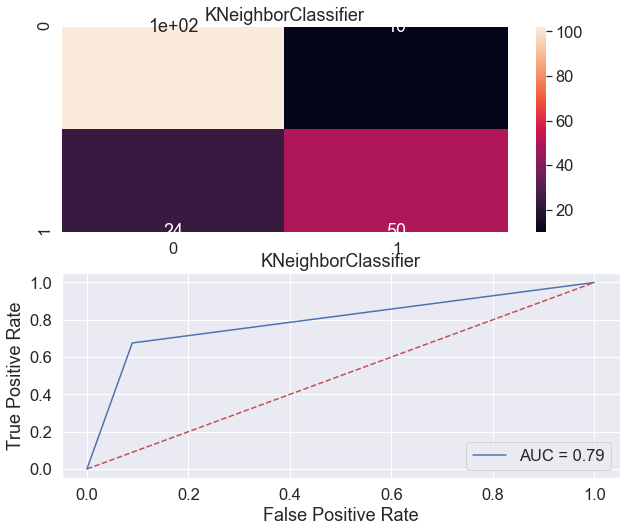

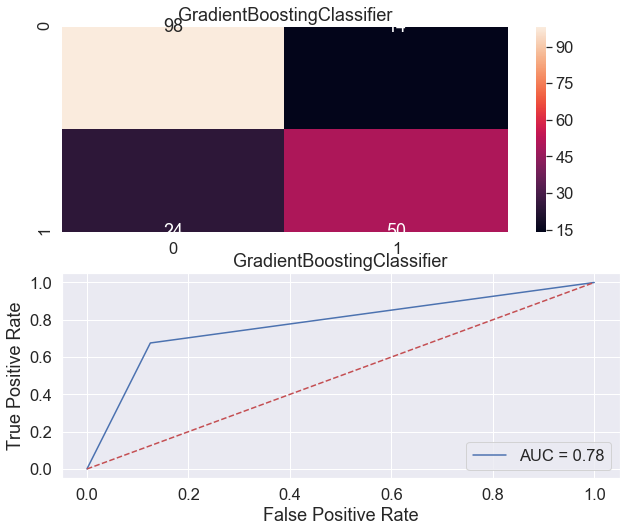

In [160]:
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("KNeighborClassifier",KNeighborsClassifier(n_neighbors=6)))    
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label= 'AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n\n")



In [161]:
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,accuracy_score,Cross_val_score,Roc_auc_curve
0,SVC,80.107527,81.403884,77.980212
1,Random Forest,81.720430,81.636276,80.465734
2,DecisionTree,74.731183,72.554875,73.515927
3,KNeighborClassifier,81.720430,79.975077,79.319498
4,GradientBoostingClassifier,79.569892,79.641980,77.533784


In [162]:
from sklearn.model_selection import GridSearchCV
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
# Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.20)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500, total=   1.3s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.7s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.3s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samp

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.5s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.5s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  7.4min finished


In [163]:
gs_clf.best_params_


{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 2000}

In [164]:
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)


Acc: 86.39%
Precision: 0.84
Recall: 0.73
F1 score: 0.78


In [165]:
grid_3={'n_neighbors':[3,5,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
# Setup GridSearchCV
gs_clf1 = GridSearchCV(KNeighborsClassifier(),
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,
                      n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf1.fit(x_train, y_train);


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  57 out of  80 | elapsed:    4.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.1s finished


In [166]:
gs_y_preds1 = gs_clf1.predict(x_test)

# Evaluate the predictions
gs_metrics1 = evaluate_preds(y_test, gs_y_preds1)
print(gs_clf1.best_params_)

Acc: 85.80%
Precision: 0.78
Recall: 0.80
F1 score: 0.79
{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}


In [167]:
knn=KNeighborsClassifier(metric='euclidean', n_neighbors= 19, weights= 'uniform')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
knnpred=knn.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,knnpred))
print('Confusion Matrix:',confusion_matrix(y_test,knnpred))
print('Classification Report:',classification_report(y_test,knnpred))

Accuracy Score: 0.8579881656804734
Confusion Matrix: [[100  13]
 [ 11  45]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       113
         1.0       0.78      0.80      0.79        56

    accuracy                           0.86       169
   macro avg       0.84      0.84      0.84       169
weighted avg       0.86      0.86      0.86       169



In [178]:
rf=RandomForestClassifier(n_estimators=2000,criterion='entropy',random_state=85)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rfpred=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,rfpred))
print('Confusion Matrix:',confusion_matrix(y_test,rfpred))
print('Classification Report:',classification_report(y_test,rfpred))

Accuracy Score: 0.8994082840236687
Confusion Matrix: [[107   6]
 [ 11  45]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       113
         1.0       0.88      0.80      0.84        56

    accuracy                           0.90       169
   macro avg       0.89      0.88      0.88       169
weighted avg       0.90      0.90      0.90       169



In [179]:
from sklearn.ensemble import AdaBoostClassifier
rf=RandomForestClassifier(n_estimators=2000,criterion='entropy')
ad = AdaBoostClassifier(n_estimators=100, base_estimator=rf)
ad.fit(x, y)
ad.score(x_train,y_train)
adpred=ad.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,adpred))
print('Confusion Matrix:',confusion_matrix(y_test,adpred))
print('Classification Report:',classification_report(y_test,adpred))


Accuracy Score: 1.0
Confusion Matrix: [[113   0]
 [  0  56]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       113
         1.0       1.00      1.00      1.00        56

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169



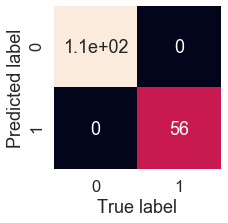

In [180]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, adpred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, adpred),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, adpred)

In [181]:
print(confusion_matrix(y_test, adpred))

[[113   0]
 [  0  56]]


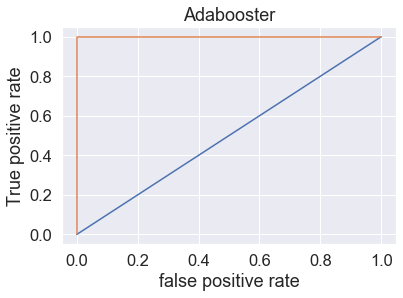

roc_auc_score =  1.0


In [182]:
# Make predictions with probabilities
y_probs = ad.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='adabooster')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('Adabooster')
plt.show()
roc_auc=auc(fpr,tpr)
print('roc_auc_score = ',roc_auc)

In [183]:
pd.crosstab(df_titanic["Sex"], df_titanic["Survived"])

Survived,0.0,1.0
Sex,,
0.0,71,231
1.0,437,105


In [184]:
a=pd.DataFrame(data=y_test)
a['ypred']=adpred
a

,Survived,ypred
361,0.0,0.0
374,0.0,0.0
87,0.0,0.0
453,1.0,1.0
767,0.0,0.0
...,...,...
877,0.0,0.0
519,0.0,0.0
171,0.0,0.0
521,0.0,0.0


In [185]:
adaprediction = evaluate_preds(y_test, adpred)
adaprediction

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

In [186]:
from sklearn.externals import joblib
joblib.dump(ad,'titanic_pred.pkl')

['titanic_pred.pkl']

In [187]:
ada_from_joblib=joblib.load('titanic_pred.pkl')
joblib_y_preds = ada_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)


Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}